## Movie 4: Functional roles of NHE1 and/or SWELL1 in cell dissemination from 3D breast cancer spheroids embedded on 2D collagen I-coated surfaces

In [54]:
%matplotlib inline
from skimage import io
from skimage.filters import threshold_otsu
from skimage.filters.rank import entropy
from skimage.morphology import disk
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os

movie4_path = "movies/movie4.avi"

In [56]:
# This cell was used to store each frame from the video to be used for calibrating and testing parameters
#movie_path = "movies/movie4.avi"
#output_path = "movies/movie4"
#movie = cv2.VideoCapture(movie_path)
#count = 0
#while movie.isOpened():
#    count += 1
#    success, frame = movie.read()
#    if not success:
#        break
#    cv2.imwrite(f'{output_path}/frame{count}.jpg', frame)

#movie.release()
#cv2.destroyAllWindows()

SC Entropy: 0.09168995238394
Dual KD Entropy: 0.044668502168989


Text(0.5, 1.0, 'Frame 6')

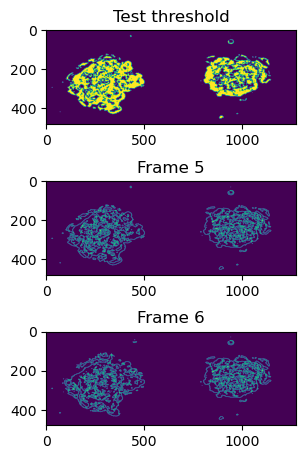

In [58]:
fig, (ax0, ax1, ax2) = plt.subplots(3, sharex=False, sharey=False)
fig.tight_layout(pad=2.0)

img_raw = io.imread("movies/movie4/frame23.jpg")
img_frame_5 = io.imread("movies/movie4/frame5.jpg")
img_frame_6 = io.imread("movies/movie4/frame6.jpg")

sc_frame_5 = img_frame_5[80:590, :520]
sc_frame_5 = cv2.cvtColor(sc_frame_5, cv2.COLOR_BGR2RGB)
sc_frame_5_gray = cv2.cvtColor(sc_frame_5, cv2.COLOR_BGR2GRAY)
sc_frame_6 = img_frame_6[80:590, :520]
sc_frame_6 = cv2.cvtColor(sc_frame_6, cv2.COLOR_BGR2RGB)
sc_frame_6_gray = cv2.cvtColor(sc_frame_6, cv2.COLOR_BGR2GRAY)

sc_frame = img_raw[80:590, :520]
sc_frame = cv2.cvtColor(sc_frame, cv2.COLOR_BGR2RGB)
sc_frame_gray = cv2.cvtColor(sc_frame, cv2.COLOR_BGR2GRAY)

dual_kd_5_frame = img_raw[80:590, 550:]
dual_kd_5_frame = cv2.cvtColor(dual_kd_5_frame, cv2.COLOR_BGR2RGB)
dual_kd_5_frame_gray = cv2.cvtColor(dual_kd_5_frame, cv2.COLOR_BGR2GRAY)
dual_kd_6_frame = img_raw[80:590, 550:]
dual_kd_6_frame = cv2.cvtColor(dual_kd_6_frame, cv2.COLOR_BGR2RGB)
dual_kd_6_frame_gray = cv2.cvtColor(dual_kd_6_frame, cv2.COLOR_BGR2GRAY)

dual_kd_frame = img_raw[80:590, 550:]
dual_kd_frame = cv2.cvtColor(dual_kd_frame, cv2.COLOR_BGR2RGB)
dual_kd_frame_gray = cv2.cvtColor(dual_kd_frame, cv2.COLOR_BGR2GRAY)

# Clean frames
_, sc_entropy_thresh = cv2.threshold(sc_frame_gray, 120, 255, cv2.THRESH_BINARY)
_, dual_kd_entropy_thresh = cv2.threshold(dual_kd_frame_gray, 120, 255, cv2.THRESH_BINARY)
_, sc_entropy_5_thresh = cv2.threshold(sc_frame_5_gray, 120, 255, cv2.THRESH_BINARY)
_, dual_kd_entropy_5_thresh = cv2.threshold(dual_kd_5_frame_gray, 120, 255, cv2.THRESH_BINARY)
_, sc_entropy_6_thresh = cv2.threshold(sc_frame_6_gray, 120, 255, cv2.THRESH_BINARY)
_, dual_kd_entropy_6_thresh = cv2.threshold(dual_kd_6_frame_gray, 120, 255, cv2.THRESH_BINARY)

sc_entropy_5_frame = entropy(sc_entropy_5_thresh, disk(1))
dual_kd_entropy_5_frame = entropy(dual_kd_entropy_5_thresh, disk(1))
sc_entropy_6_frame = entropy(sc_entropy_6_thresh, disk(1))
dual_kd_entropy_6_frame = entropy(dual_kd_entropy_6_thresh, disk(1))

sc_entropy_frame = entropy(sc_entropy_thresh, disk(1))
dual_kd_entropy_frame = entropy(dual_kd_entropy_thresh, disk(1))

width = 640
height = 480
frame_size = (width, height)

sc_5_resized = cv2.resize(sc_entropy_5_frame, frame_size)
kd_5_resized = cv2.resize(dual_kd_entropy_5_frame, frame_size)
sc_6_resized = cv2.resize(sc_entropy_6_frame, frame_size)
kd_6_resized = cv2.resize(dual_kd_entropy_6_frame, frame_size)

sc_resized = cv2.resize(sc_entropy_frame, frame_size)
kd_resized = cv2.resize(dual_kd_entropy_frame, frame_size)

#sc_dual_kd_raw = np.hstack((cv2.resize(sc_frame, frame_size), cv2.resize(dual_kd_frame, frame_size)))
sc_dual_kd_5_stack = np.hstack((sc_5_resized, kd_5_resized))
sc_dual_kd_6_stack = np.hstack((sc_6_resized, kd_6_resized))

print("SC Entropy:", cv2.mean(sc_entropy_frame)[0])
print("Dual KD Entropy:", cv2.mean(dual_kd_entropy_frame)[0])

ax0.imshow(np.hstack((cv2.resize(sc_entropy_5_thresh, frame_size), cv2.resize(dual_kd_entropy_5_thresh, frame_size))))
ax1.imshow(sc_dual_kd_5_stack)
ax2.imshow(sc_dual_kd_6_stack)

ax0.set_title("Test threshold")
ax1.set_title("Frame 5")
ax2.set_title("Frame 6")

## Mean pixels of entropy frames as measure of cell migration rate
- The mean pixel values obtained with 'cv2.mean()' are used as entropy values
- Each value in each frame is appended to the 'entropies' list which will be converted to a Pandas dataframe for analysis
- The time interval between each frame is 20 minutes.

In [61]:
print("Press 'q' to end video")
cap = cv2.VideoCapture(movie4_path)

# Get movie frame size
width = 640
height = 480
frame_size = (width,height)

output_frames = "movies/out4"

frame_index = 0 # Track frame number for fluorescent intensity table

entropies = []

while True:
    frame_index += 1
    success, frame = cap.read()

    if success and frame.size != 0:
        # Isolate regions of interest
        sc_frame = frame[80:590, :520]
        sc_frame = cv2.cvtColor(sc_frame, cv2.COLOR_BGR2RGB)
        sc_frame_gray = cv2.cvtColor(sc_frame, cv2.COLOR_BGR2GRAY)

        dual_kd_frame = frame[80:590, 550:]
        dual_kd_frame = cv2.cvtColor(dual_kd_frame, cv2.COLOR_BGR2RGB)
        dual_kd_frame_gray = cv2.cvtColor(dual_kd_frame, cv2.COLOR_BGR2GRAY)

        _, sc_entropy_thresh = cv2.threshold(sc_frame_gray, 120, 255, cv2.THRESH_BINARY)
        _, dual_kd_entropy_thresh = cv2.threshold(dual_kd_frame_gray, 120, 255, cv2.THRESH_BINARY)

        sc_entropy_frame = entropy(sc_entropy_thresh, disk(1))
        dual_kd_entropy_frame = entropy(dual_kd_entropy_thresh, disk(1))

        sc_entropy = cv2.mean(sc_entropy_frame)[0]
        dual_kd_entropy = cv2.mean(dual_kd_entropy_frame)[0]

        #print(sc_entropy, dual_kd_entropy)

        # Append entropy data
        entropies.append([frame_index, sc_entropy, dual_kd_entropy, (frame_index*20)-20])

        # Add regions to blank canvas
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        canvas = np.ones((frame_gray.shape), np.uint8)
        canvas[80:590, :520] = sc_frame_gray
        canvas[80:590, 550:] = dual_kd_frame_gray

        # Resize frame
        sc = cv2.resize(sc_frame_gray, frame_size)
        dual_kd = cv2.resize(dual_kd_frame_gray, frame_size)

        sc_dual_kd_stack = np.hstack((sc, dual_kd))

        # For some reason, I could not save the video directly. So I had to save each frame first, then use them to generate a video
        cv2.imwrite(f'{output_frames}/frame{frame_index}.jpg', sc_dual_kd_stack, [cv2.IMWRITE_JPEG_QUALITY, 90])

        cv2.imshow("Movie 4", sc_dual_kd_stack)

    else:
        break

    # 1 frame per second
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Save video
video_frames = os.listdir(output_frames)
video_frame = cv2.imread(os.path.join(output_frames, video_frames[0]))
height, width, layers = video_frame.shape

video = cv2.VideoWriter('movie4_segments.avi', 0, 1, (width, height))
for f in video_frames:
    video.write(cv2.imread(os.path.join(output_frames, f)))

video.release()

cap.release()
cv2.destroyAllWindows()
print("Video saved in movies/out4")

Press 'q' to end video
Video saved in movies/out4


## Calculate change in entropy
- SC: Scramble Control
- DUAL_KD: Dual NHE1/SWELL1 Knockdown

In [64]:
entropies_dataframe = pd.DataFrame(entropies, columns =  ["Frame", "SC", "DUAL_KD", "Time"])
entropies_dataframe["SC_ENTROPY_CHANGE"] = entropies_dataframe["SC"] - entropies_dataframe["SC"][0]
entropies_dataframe["DUAL_KD_ENTROPY_CHANGE"] = entropies_dataframe["DUAL_KD"] - entropies_dataframe["DUAL_KD"][0]

entropies_dataframe.describe()

,Frame,SC,DUAL_KD,Time,SC_ENTROPY_CHANGE,DUAL_KD_ENTROPY_CHANGE
count,23.00000,23.000000,23.000000,23.0000,23.000000,23.000000
mean,12.00000,0.067598,0.044120,220.0000,0.017215,0.001500
std,6.78233,0.013565,0.001380,135.6466,0.013565,0.001380
min,1.00000,0.050384,0.042077,0.0000,0.000000,-0.000543
25%,6.50000,0.055669,0.043116,110.0000,0.005285,0.000496
50%,12.00000,0.065077,0.043683,220.0000,0.014693,0.001063
75%,17.50000,0.078607,0.045001,330.0000,0.028223,0.002381
max,23.00000,0.091540,0.047340,440.0000,0.041157,0.004720


## Compare Entropy change in SC cells and Dual KD cells

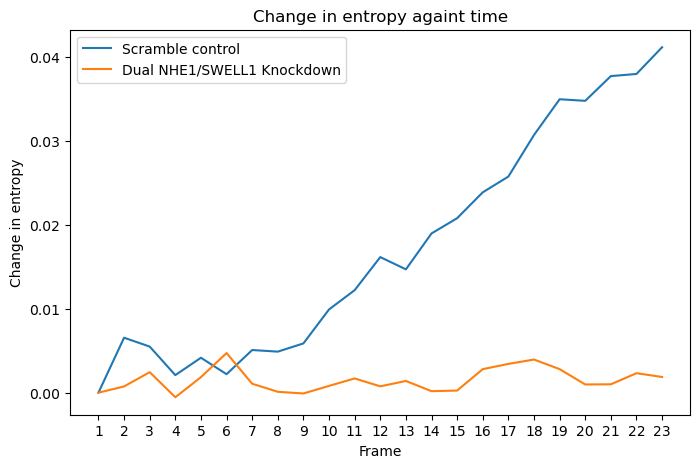

In [67]:
plt.figure(figsize=(8,5))
plt.plot(entropies_dataframe.Frame, entropies_dataframe.SC_ENTROPY_CHANGE, label="Scramble control")
plt.plot(entropies_dataframe.Frame, entropies_dataframe.DUAL_KD_ENTROPY_CHANGE, label="Dual NHE1/SWELL1 Knockdown")

plt.title("Change in entropy againt time")
plt.ylabel("Change in entropy")
plt.xlabel("Frame")
plt.legend()
plt.xticks(entropies_dataframe.Frame)
plt.savefig("movie4_entropy_line_plot.png")
plt.show()

- SC cells migrate faster over time
- Dual NHE1/SWELL1 knockdown cells show almost no migration

## Regression Analysis of SC cells and Dual KD cells

In [72]:
sc_data_set = entropies_dataframe[["Frame", "SC_ENTROPY_CHANGE"]]

In [74]:
sc_data_set.corr()

,Frame,SC_ENTROPY_CHANGE
Frame,1.000000,0.963245
SC_ENTROPY_CHANGE,0.963245,1.000000


In [76]:
import statsmodels.api as sm
X_SC = sm.add_constant(sc_data_set[["Frame"]])
Y_SC = sc_data_set[["SC_ENTROPY_CHANGE"]]
SC_Reg_res = sm.OLS(Y_SC, X_SC).fit()
print(SC_Reg_res.summary())

                            OLS Regression Results                            
Dep. Variable:      SC_ENTROPY_CHANGE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     270.0
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           1.83e-13
Time:                        04:06:24   Log-Likelihood:                 97.014
No. Observations:                  23   AIC:                            -190.0
Df Residuals:                      21   BIC:                            -187.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0059      0.002     -3.672      0.0

### Regression model for Entropy change in Dual Knockdown cells

In [80]:
kd_data_set = entropies_dataframe[["Frame", "DUAL_KD_ENTROPY_CHANGE"]]

In [82]:
kd_data_set.corr()

,Frame,DUAL_KD_ENTROPY_CHANGE
Frame,1.000000,0.289681
DUAL_KD_ENTROPY_CHANGE,0.289681,1.000000


In [84]:
X_KD = sm.add_constant(kd_data_set[["Frame"]])
Y_KD = kd_data_set[["DUAL_KD_ENTROPY_CHANGE"]]
KD_Reg_res = sm.OLS(Y_KD, X_KD).fit()
print(KD_Reg_res.summary())

                              OLS Regression Results                              
Dep. Variable:     DUAL_KD_ENTROPY_CHANGE   R-squared:                       0.084
Model:                                OLS   Adj. R-squared:                  0.040
Method:                     Least Squares   F-statistic:                     1.924
Date:                    Fri, 22 Nov 2024   Prob (F-statistic):              0.180
Time:                            04:06:27   Log-Likelihood:                 120.35
No. Observations:                      23   AIC:                            -236.7
Df Residuals:                          21   BIC:                            -234.4
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [86]:
SC_Reg_res.params

const   -0.005903
Frame    0.001926
dtype: float64

In [88]:
KD_Reg_res.params

const    0.000793
Frame    0.000059
dtype: float64

In [90]:
SC_Reg_res.rsquared_adj

0.9244042869686777

In [92]:
KD_Reg_res.rsquared_adj

0.04029192694944661

## WALD TEST
- Compare the regression coefficients of SC cells with those of Dual KD cells

In [95]:
SC_Reg_res.wald_test(f'(Frame = {KD_Reg_res.params.Frame})', scalar=True)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=253.75118418863087, p=3.355945257444636e-13, df_denom=21, df_num=1>